# 🌳 Decision Tree in Machine Learning

## 1. What is a Decision Tree?
A **Decision Tree** is a supervised learning algorithm used for both **classification** and **regression** tasks.

- It looks like a **flowchart**:
  - **Internal nodes** → represent a decision (based on a feature).
  - **Branches** → represent the outcome of the decision.
  - **Leaf nodes** → represent the final class label or value.

👉 Example:
If you want to predict whether a person will buy a product:
- Node: "Is salary > 50k?"
  - Yes → Next check: "Age < 30?"
    - Yes → Predict "Buy"
    - No → Predict "Not Buy"
  - No → Predict "Not Buy"

---

## 2. How a Decision Tree Works
- The dataset is split into smaller subsets.
- At each step, the algorithm chooses the **best feature** to split the data.
- Splitting continues until stopping conditions are met (max depth, pure nodes, etc.).

---

## 3. Important Concepts

### (a) Entropy (Measure of Impurity)
\[
Entropy = - \sum p_i \log_2(p_i)
\]
- If all samples belong to one class → Entropy = 0 (pure).
- If samples are evenly split → Entropy = 1 (maximum impurity).

### (b) Information Gain (IG)
\[
IG = Entropy(parent) - \sum \frac{n_{child}}{n_{parent}} \times Entropy(child)
\]
- The feature with **highest Information Gain** is chosen for splitting.

### (c) Gini Index
\[
Gini = 1 - \sum p_i^2
\]
- Lower Gini → purer split.
- Commonly used in **CART (Classification and Regression Trees)**.

---

## 4. Advantages
✅ Easy to understand & visualize  
✅ Works for both classification & regression  
✅ Handles numerical & categorical data  
✅ No need for feature scaling  

---

## 5. Disadvantages
❌ Prone to **overfitting** if not controlled  
❌ Sensitive to noisy data  
❌ Can be biased if some classes dominate  
❌ Small changes in data may produce a different tree  

---

## 6. Preventing Overfitting
- **Pruning**: remove unnecessary branches  
- **Max Depth**: limit depth of the tree  
- **Min Samples Split/Leaf**: set minimum samples required for splitting  
- **Use Ensembles**: Random Forests, Gradient Boosted Trees  

---

## 7. Real-world Applications
- Credit risk assessment  
- Medical diagnosis  
- Customer churn prediction  
- Loan approval systems  

---

## 📌 Conclusion
Decision Trees are simple yet powerful algorithms for classification and regression.  
They work by recursively splitting the dataset based on the most informative features.  
Although they may suffer from overfitting, techniques like pruning and ensemble methods (Random Forest, Gradient Boosting) make them highly effective in real-world applications.


# Decision Tree Classifier Project – Iris Dataset
In this project, we will build a **Decision Tree Classifier** using the famous **Iris flower dataset**.  
We will train a model, visualize the tree, and evaluate its performance.

In [12]:
# 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## 2: Load the Dataset
We will use the built-in **Iris dataset** from scikit-learn.  
It contains 150 samples of flowers with 4 features:
- Sepal Length
- Sepal Width
- Petal Length
- Petal Width  

Target: Type of Iris flower (Setosa, Versicolor, Virginica).


In [13]:
# Load dataset
iris = load_iris()

# Convert to DataFrame for better visualization
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Map target values to flower names
df['species'] = df['target'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa


## 3: Exploratory Data Analysis (EDA)
We will check basic details of the dataset, distribution of classes, and feature relationships.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   species            150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


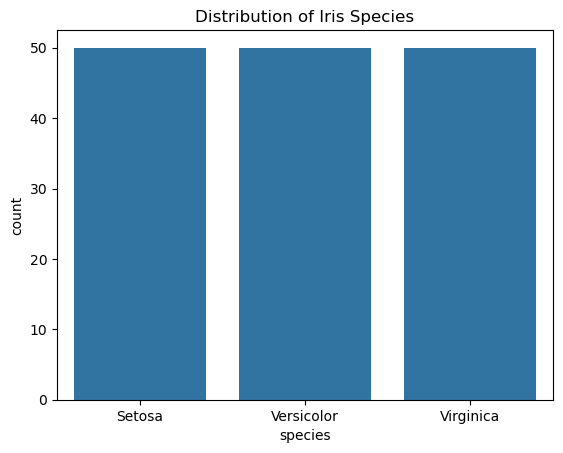

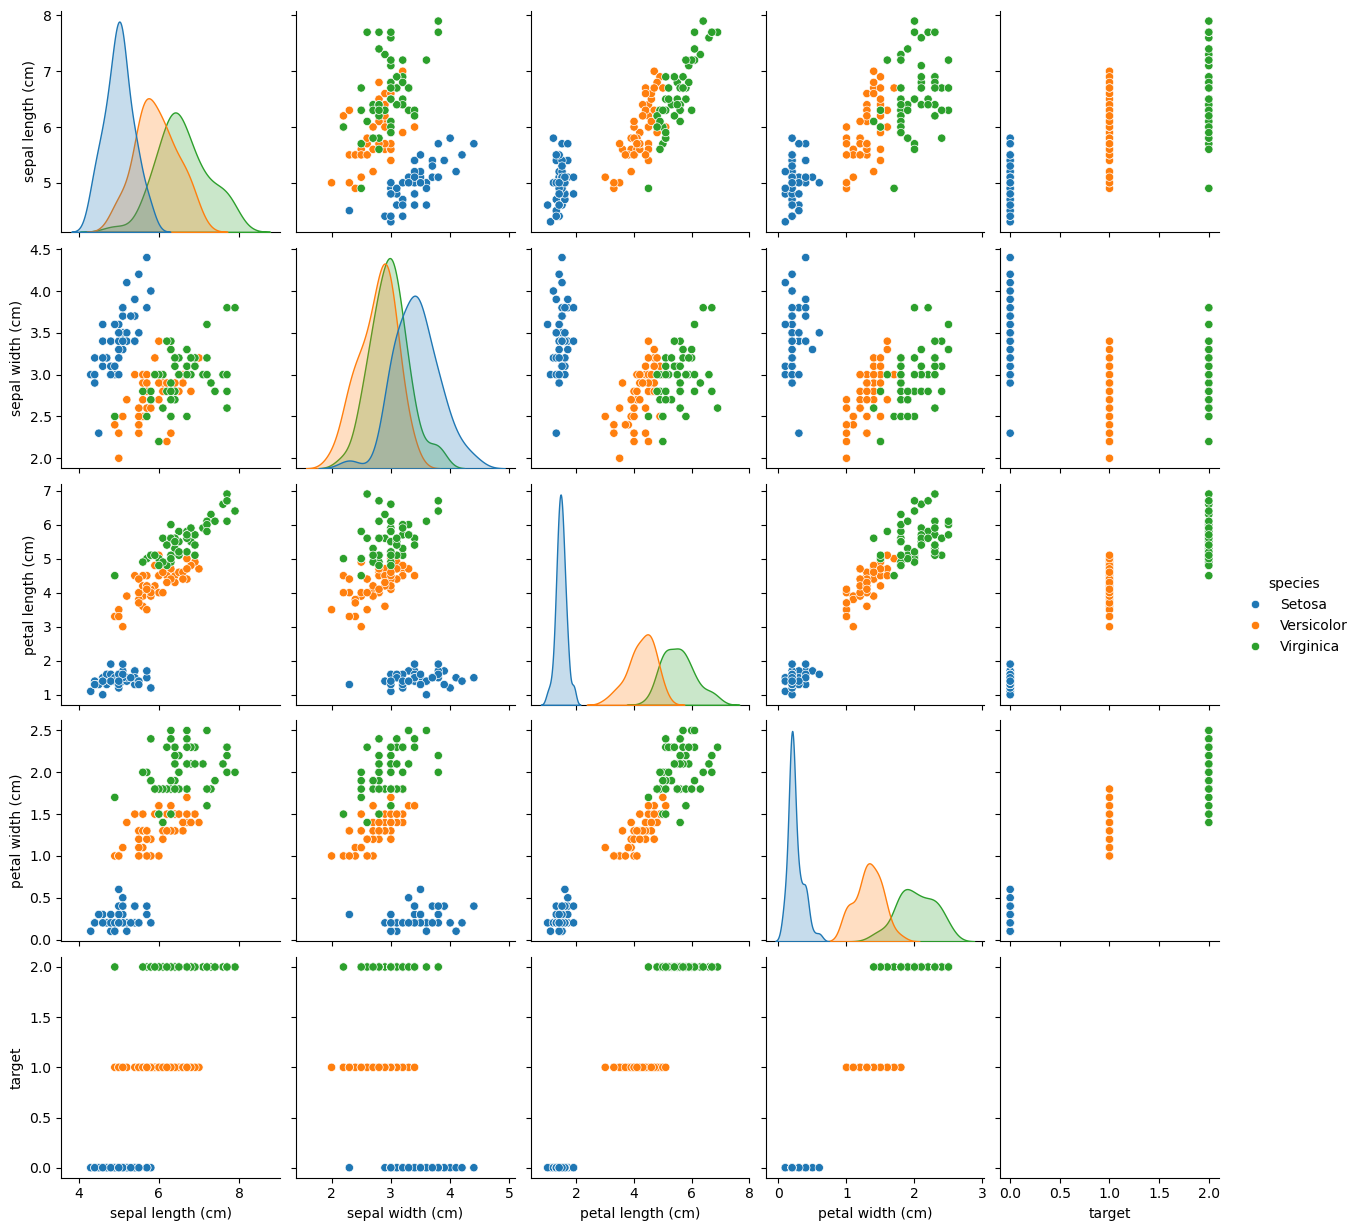

In [14]:
# Dataset info
df.info()

# Class distribution
sns.countplot(x="species", data=df)
plt.title("Distribution of Iris Species")
plt.show()

# Pairplot for feature visualization
sns.pairplot(df, hue="species")
plt.show()

## 4: Splitting the Dataset
We split the dataset into **training set (80%)** and **testing set (20%)**.

In [15]:
X = df.drop(["target", "species"], axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 120
Testing samples: 30


## 5: Train Decision Tree Classifier
We create a **DecisionTreeClassifier** model and fit it on training data.

In [16]:
# Initialize model
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)

# Train model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

## Step 6: Model Evaluation
We will check accuracy, confusion matrix, and classification report.

Accuracy: 0.9666666666666667


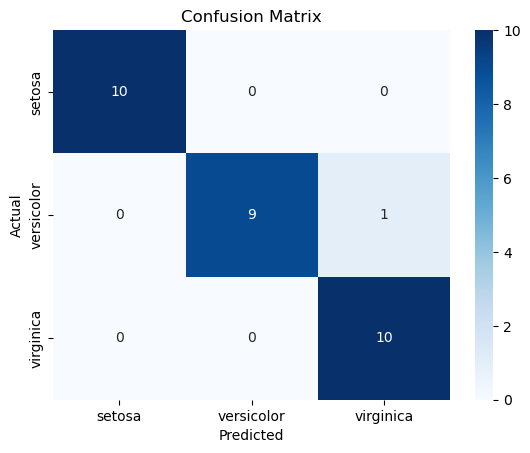

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [17]:
# Predictions
y_pred = dt_model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=iris.target_names))

## Step 7: Visualize the Decision Tree
We will plot the trained decision tree to understand how the model makes decisions.

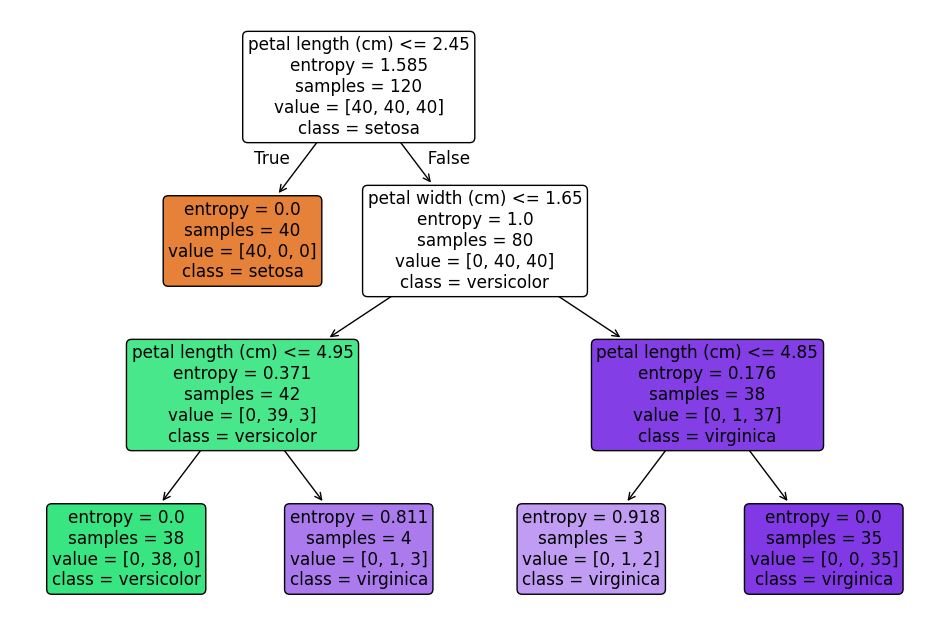

In [18]:
plt.figure(figsize=(12,8))
plot_tree(dt_model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.show()

# 📌 Conclusion
- We trained a **Decision Tree Classifier** on the Iris dataset.  
- Accuracy on test data was quite high (close to 100% in many runs).  
- Visualization of the tree shows which features are most important for splitting.  

✅ Decision Trees are easy to interpret and perform well on small datasets.  
❌ But they can overfit if not pruned or controlled with parameters like `max_depth`.  
